# Fluxonium Design with 6 single qubits NEW EVEN SIMPLER look

## GDS file

### Preparations

In [1]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs
import matplotlib.pyplot as plt

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround

In [2]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'
design._chips['main']['size']['size_x'] = '9mm'
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True

gui = MetalGUI(design)

In [3]:
#Setup the launchpad1 location and orientation

## Read In launch pad
launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='-3.99mm', orientation='0',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='58um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPReadIn', options = launch_options)


# Read Out launch pad
launch_options = dict(chip='main', pos_x='4.1mm', pos_y='3.99mm', orientation='180',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPReadOut', options = launch_options)



Transmission_Line = {'pin_inputs':
           {'start_pin': {'component': 'LPReadIn', 'pin': 'tie'},
             'end_pin': {'component': 'LPReadOut', 'pin': 'tie'}},
            'lead': {'start_straight': '300um', 'end_straight': '4070um',
                    # 'start_jogged_extension': jogs_in,
                    # 'anchors': anchors1,
                    }, 
                    'total_length': '8mm', 'fillet': "90um"
            }

TransLine = RoutePathfinder(design, 'TL', Transmission_Line)


gui.rebuild()

In [4]:
## Q1 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='-2.66mm', orientation='0',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPCL1', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='-1.33mm', orientation='0',
                     lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPFB1', options = launch_options)


## Q2 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='0.0mm', orientation='0',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPCL2', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='+1.33mm', orientation='0',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPFB2', options = launch_options)


## Q3 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='2.66mm', orientation='0',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPCL3', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='3.99mm', orientation='0',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPFB3', options = launch_options)


## Q4 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.1mm', pos_y='2.66mm', orientation='180',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPFB4', options = launch_options)

launch_options = dict(chip='main', pos_x='4.1mm', pos_y='1.33mm', orientation='180',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPCL4', options = launch_options)


## Q5 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.1mm', pos_y='0.0mm', orientation='180',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPFB5', options = launch_options)

launch_options = dict(chip='main', pos_x='4.1mm', pos_y='-1.33mm', orientation='180',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPCL5', options = launch_options)


## Q6 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.1mm', pos_y='-2.66mm', orientation='180',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPFB6', options = launch_options)

launch_options = dict(chip='main', pos_x='4.1mm', pos_y='-3.99mm', orientation='180',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPCL6', options = launch_options)


gui.rebuild()

In [5]:
from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_chain0'

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =90, pos_x = '-2.2mm', pos_y = '-2.3mm',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
                        fbl_sep='150um',), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
            cl_sep ='-10um'),
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
            pad_width = '300um', pad_height = '80um',
            pad_sep='60um', 
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))

# Q6 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.2mm', pos_y = '-3.2mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
                        fbl_sep='150um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
            cl_sep ='-10um',
                            ), 
    readout_line_options=Dict(loc_H = +1, make_rol = True, 
            pad_width = '300um', pad_height = '80um',
            pad_sep='60um', 
              ) )
               
q6 = FluxoniumPocket(design,'Q6', options = dict(
        **options))


# Q2 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-2.2mm', pos_y = '0.0mm',
        gds_cell_name=gds_cell_name_jj,
               gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
                        fbl_sep='150um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
            cl_sep ='-10um',
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
            pad_width = '300um', pad_height = '80um',
            pad_sep='60um', 
              ) )
               
q2 = FluxoniumPocket(design,'Q2', options = dict(
        **options))

# Q5 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.4mm', pos_y = '-0.8mm',
        gds_cell_name=gds_cell_name_jj,
               gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
                      
    flux_bias_line_options=Dict(make_fbl = True,
                        fbl_sep='150um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
            cl_sep ='-10um',
                            ), 
    readout_line_options=Dict(loc_H = +1, make_rol = True, 
            pad_width = '300um', pad_height = '80um',
            pad_sep='60um', 
              ) )
               
q5 = FluxoniumPocket(design,'Q5', options = dict(
        **options))


# Q3 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-2.5mm', pos_y = '3.0mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
                        fbl_sep='150um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
            cl_sep ='-10um',
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
            pad_width = '300um', pad_height = '80um',
            pad_sep='60um', 
              ) )
               
q3 = FluxoniumPocket(design,'Q3', options = dict(
        **options))

# Q4 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.4mm', pos_y = '2.0mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
                        fbl_sep='150um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
            cl_sep ='-10um',
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = True, 
            pad_width = '300um', pad_height = '80um',
            pad_sep='60um', 
              ) )
               
q4 = FluxoniumPocket(design,'Q4', options = dict(
        **options))

# Q JJ1 Trial details
options = dict(chip='main',  nanowire = False,
        orientation =90, pos_x = '-1.0mm', pos_y = '1.0mm',
               pocket_width= '600um',
        gds_cell_name=gds_cell_name_jj,
               
    flux_bias_line_options=Dict(make_fbl = False), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = False,
              ) )
               
qJJ1 = FluxoniumPocket(design,'QJJ1', options = dict(
        **options))

# Q JJ2 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-1.0mm', pos_y = '1.2mm',
               pocket_width= '600um',
        gds_cell_name=gds_cell_name_jj,   
               
    flux_bias_line_options=Dict(make_fbl = False), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = False,
              ) )
               
qJJ2 = FluxoniumPocket(design,'QJJ2', options = dict(
        **options))

# Q JJ3 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-1.0mm', pos_y = '1.4mm',
               pocket_width= '600um',
        gds_cell_name=gds_cell_name_jj,  
               
    flux_bias_line_options=Dict(make_fbl = False), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = False,
              ) )
               
qJJ3 = FluxoniumPocket(design,'QJJ3', options = dict(
        **options))


# Q Array1 details
options = dict(chip='main', nanowire = False, 
            orientation =90, pos_x = '1.0mm', pos_y = '0.6mm',
            gds_cell_inductor=gds_cell_name_inductor , pocket_width= '600um',
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = False,
                        fbl_sep='150um',), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = False,
            cl_sep ='-10um'),
    readout_line_options=Dict(loc_H = -1, make_rol = False, 
            pad_width = '300um', pad_height = '80um',
            pad_sep='60um', 
              ) )
               
qArr1 = FluxoniumPocket(design,'QArr1', options = dict(
             **options))


# Q Array2 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '1.0mm', pos_y = '0.8mm',
               pocket_width= '600um',
        gds_cell_inductor=gds_cell_name_inductor ,   
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = False,
                        fbl_sep='150um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = False,
            cl_sep ='-10um',
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = False, 
            pad_width = '300um', pad_height = '80um',
            pad_sep='60um', 
              ) )
               
qArr2 = FluxoniumPocket(design,'QArr2', options = dict(
        **options))

# Q Array3 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '1.0mm', pos_y = '1.0mm',
               pocket_width= '600um',
        gds_cell_inductor=gds_cell_name_inductor , 
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = False,
                        fbl_sep='150um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = False,
            cl_sep ='-10um',
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = False, 
            pad_width = '300um', pad_height = '80um',
            pad_sep='60um', 
              ) )
               
qArr3 = FluxoniumPocket(design,'QArr3', options = dict(
        **options))


gui.rebuild()

In [3]:
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_chain0'

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =90, pos_x = '-2.2mm', pos_y = '-2.3mm',
               pocket_height='600um', pocket_width='900um',
               pad_height='100um',
        pad_radius='45um',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='85um', cpw_width ='10um',
                        cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
            cl_sep ='-20um'),
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
            pad_width = '400um', pad_height = '120um',
            pad_sep='70um', 
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))

gui.rebuild()
#gui.autoscale()

In [6]:
# Lambda/2 resonator for Q1
otg1 = OpenToGround(design, 'otg1s', options=dict(chip='main', 
                 pos_x='-37.733um', pos_y='-2.8mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity1',  Dict(meander=Dict(spacing='200um'),
        total_length='8.4mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg1s', pin='open'),
            end_pin=Dict(component='Q1', pin='readout_line')), ))


gui.rebuild()

In [7]:
# Lambda/2 resonator for Q6
otg6 = OpenToGround(design, 'otg6s', options=dict(chip='main', pos_x='37.733um',  pos_y='-2.4mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity6',  Dict(meander=Dict(spacing='200um'),
        total_length='9.0mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg6s', pin='open'),
            end_pin=Dict(component='Q6', pin='readout_line')), ))


gui.rebuild()

In [8]:
# Lambda/2 resonator for Q2
otg2 = OpenToGround(design, 'otg2s', options=dict(chip='main', pos_x='-37.733um',  pos_y='-1.0mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity2',  Dict(meander=Dict(spacing='200um'),
        total_length='9.6mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg2s', pin='open'),
            end_pin=Dict(component='Q2', pin='readout_line')), ))


gui.rebuild()

In [9]:
# Lambda/2 resonator for Q5
otg5 = OpenToGround(design, 'otg5s', options=dict(chip='main', pos_x='37.733um',  pos_y='-0.5mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity5',  Dict(meander=Dict(spacing='200um'),
        total_length='10.2mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg5s', pin='open'),
            end_pin=Dict(component='Q5', pin='readout_line')), ))


gui.rebuild()

In [10]:
# Lambda/2 resonator for Q3
otg3 = OpenToGround(design, 'otg3s', options=dict(chip='main', pos_x='-37.733um',  pos_y='2.6mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity3',  Dict(meander=Dict(spacing='200um'),
        total_length='11.0mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg3s', pin='open'),
            end_pin=Dict(component='Q3', pin='readout_line')), ))


gui.rebuild()

In [11]:
# Lambda/2 resonator for Q4
otg4 = OpenToGround(design, 'otg4s', options=dict(chip='main', pos_x='37.733um',  pos_y='2.4mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity4',  Dict(meander=Dict(spacing='200um'),
        total_length='11.9mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg4s', pin='open'),
            end_pin=Dict(component='Q4', pin='readout_line')), ))


gui.rebuild()
gui.autoscale()

In [12]:
# Charge Line and Flux Bias Line for Q1
XYCharge_LineQ1 = RoutePathfinder(design, 'XY_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='150um', end_straight='600um', 
                     ),
            pin_inputs=Dict(start_pin=Dict(component='Q1', pin='charge_line'),
                            end_pin=Dict(component='LPCL1', pin='tie')
                                            )))

gui.rebuild()

In [13]:
# Charge Line and Flux Bias Line for Q1
ZFluxBias_LineQ1 = RoutePathfinder(design, 'Z_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='200um', 
        end_straight='400um'),
        pin_inputs=Dict(start_pin=Dict(component='Q1', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB1', pin='tie')
                                   )))

gui.rebuild()

In [14]:
# Charge Lıne and Flux Bias Line for Q2
XYCharge_LineQ2 = RoutePathfinder(design, 'XY_Gate2', options = dict(chip='main',
                        fillet='80um',
                lead=dict(start_straight='150um', end_straight='850um'),
                pin_inputs=Dict(start_pin=Dict(component='Q2', pin='charge_line'),
                                    end_pin=Dict(component='LPCL2',pin='tie')
                                            )))

gui.rebuild()

In [15]:
# Charge Lıne and Flux Bias Line for Q2
ZFluxBias_LineQ2 = RoutePathfinder(design, 'Z_Gate2', options = dict(chip='main',
             fillet='99um',
          lead=dict(start_straight='250um', end_straight='250um'),
        pin_inputs=Dict(start_pin=Dict(component='Q2', pin='flux_bias_line'),
                            end_pin=Dict(component='LPFB2',pin='tie')
                                            )))

gui.rebuild()

In [16]:
# Charge Lıne and Flux Bias Line for Q3
XYCharge_LineQ3 = RoutePathfinder(design, 'XY_Gate3', options = dict(chip='main',
                         fillet='99um',
       lead=dict(start_straight='250um', end_straight='450um'), 
            pin_inputs=Dict(start_pin=Dict(component='Q3', pin='charge_line'),
                    end_pin=Dict(component='LPCL3', pin='tie')
                                            )))
gui.rebuild()

In [17]:
# Charge Lıne and Flux Bias Line for Q3
ZFluxBias_LineQ3 = RoutePathfinder(design, 'Z_Gate3', options = dict(chip='main',
                fillet='99um',
           lead=dict(start_straight='100um', end_straight='200um'),
            pin_inputs=Dict(start_pin=Dict(component='Q3', pin='flux_bias_line'),
                end_pin=Dict(component='LPFB3', pin='tie')
                                            )))

gui.rebuild()

In [18]:
# Charge Lıne and Flux Bias Line for Q6
XYCharge_LineQ6 = RoutePathfinder(design, 'XY_Gate6', 
        options = dict(chip='main', fillet='99um',
        lead=dict(start_straight='100um', end_straight='650um'),
    pin_inputs=Dict(start_pin=Dict(component='Q6', pin='charge_line'),
    end_pin=Dict(component='LPCL6', pin='tie')
                                            )))

gui.rebuild()

In [19]:
# Charge Lıne and Flux Bias Line for Q6
ZFluxBias_LineQ6 = RoutePathfinder(design, 'Z_Gate6', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='350um', end_straight='650um'),
        pin_inputs=Dict(start_pin=Dict(component='Q6', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB6', pin='tie')
                                   )))

gui.rebuild()

In [20]:
# Charge Lıne and Flux Bias Line for Q5
XYCharge_LineQ5 = RoutePathfinder(design, 'XY_Gate5', options = dict(chip='main',
                          fillet='99um',
            lead=dict(start_straight='250um', end_straight='650um'),
                    pin_inputs=Dict(start_pin=Dict(component='Q5',pin='charge_line'),
                    end_pin=Dict(component='LPCL5', pin='tie')
                                            )))

gui.rebuild()

In [21]:
# Charge Line and Flux Bias Line for Q5
ZFluxBias_LineQ5 = RoutePathfinder(design, 'Z_Gate5', options = dict(chip='main',
                        fillet='99um',
            lead=dict(start_straight='200um', end_straight='450um'),
                pin_inputs=Dict(start_pin=Dict(component='Q5', pin='flux_bias_line'),
                            end_pin=Dict(component='LPFB5', pin='tie')
                                            )))
gui.rebuild()

In [22]:
# Charge Line and Flux Bias Line for Q4
XYCharge_LineQ4 = RoutePathfinder(design, 'XY_Gate4', options = dict(chip='main',
                    fillet='99um',
                    lead=dict(start_straight='200um', end_straight='550um'),pin_inputs=Dict(
                        start_pin=Dict(component='Q4', pin='charge_line'),
                            end_pin=Dict(component='LPCL4', pin='tie')
                                            )))
gui.rebuild()

In [24]:
# Charge Lıne and Flux Bias Line for Q4
ZFluxBias_LineQ4 = RoutePathfinder(design, 'Z_Gate4', options = dict(chip='main',
                            fillet='99um',
                    lead=dict(start_straight='150um', end_straight='200um'), pin_inputs=Dict(
                            start_pin=Dict(component='Q4',
                                pin='flux_bias_line'),
                                end_pin=Dict(component='LPFB4',
                                        pin='tie')
                                            )))
gui.rebuild()

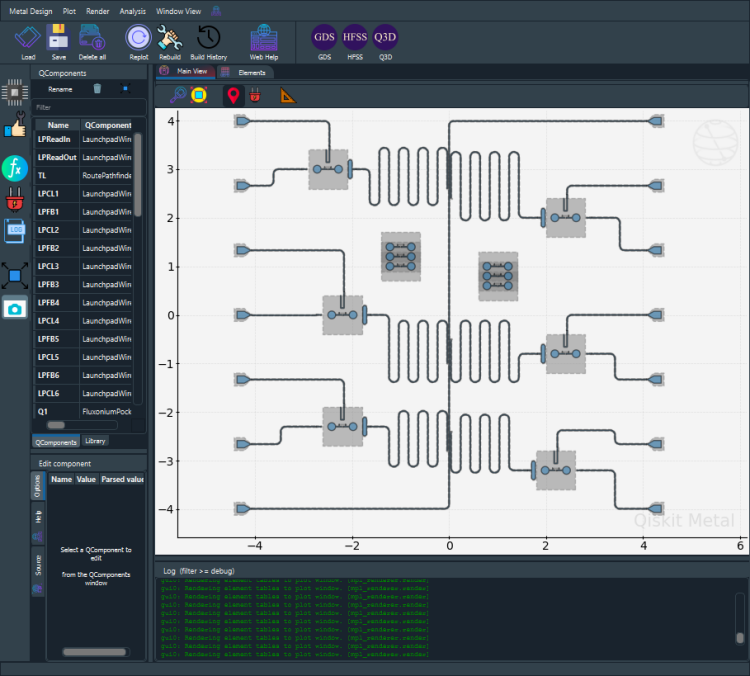

In [25]:
#Save screenshot as a .png formatted file.
gui.screenshot()

In [26]:
q1 #print Q1 information


name:    Q1
class:   FluxoniumPocket       
options: 
  'pos_x'             : '-2.2mm',                     
  'pos_y'             : '-2.3mm',                     
  'orientation'       : 90,                           
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '10um',                       
  'inductor_orientation': '-1',                         
  'pad_width'         : '15um',                       
  'pad_height'        : '140um',                      
  'pad_radius'        : '80um',                       
  'l_width'           : '1um',                        
  'array_length'      : '130um',                      
  'l_arm_width'       : '2um',                        
  'l_arm_length'      : '50um',                       
  'l_inductance'      : '200nH',                      
  'l_ind_pe

## GDS

In [4]:
fluxonium_gds = design.renderers.gds
fluxonium_gds.options

{'short_segments_to_not_fillet': 'True',
 'check_short_segments_by_scaling_fillet': '2.0',
 'gds_unit': 0.001,
 'ground_plane': 'True',
 'negative_mask': {'main': []},
 'fabricate': 'False',
 'corners': 'circular bend',
 'tolerance': '0.00001',
 'precision': '0.000000001',
 'width_LineString': '10um',
 'path_filename': '../resources/Fake_Junctions.GDS',
 'junction_pad_overlap': '5um',
 'max_points': '199',
 'cheese': {'datatype': '100',
  'shape': '0',
  'cheese_0_x': '25um',
  'cheese_0_y': '25um',
  'cheese_1_radius': '200um',
  'view_in_file': {'main': {1: True}},
  'delta_x': '100um',
  'delta_y': '100um',
  'edge_nocheese': '300um'},
 'no_cheese': {'datatype': '99',
  'buffer': '25um',
  'cap_style': '2',
  'join_style': '2',
  'view_in_file': {'main': {1: True}}},
 'bounding_box_scale_x': '1.2',
 'bounding_box_scale_y': '1.2'}

In [5]:
fluxonium_gds.options['path_filename'] = 'Fluxonium_JJandArray9by9.gds'

In [6]:
fluxonium_gds.options['fabricate'] = True

In [7]:
fluxonium_gds.export_to_gds('FluxoniumPocket-Single6Q-410nmArray100nmJJ-9by9-0.gds')

NotImplementedError: Component rings have coordinate sequences, but the polygon does not

In [31]:
# View every entry in junction table.
design.qgeometry.tables['junction']

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,hfss_resistance,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name
0,16,inductor,"LINESTRING (-2.13500 -2.25200, -2.26500 -2.25200)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_chain0
1,16,rect_jj,"LINESTRING (-2.18500 -2.30000, -2.21500 -2.30000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
2,17,inductor,"LINESTRING (2.26500 -3.15200, 2.13500 -3.15200)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_chain0
3,17,rect_jj,"LINESTRING (2.21500 -3.20000, 2.18500 -3.20000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
4,18,inductor,"LINESTRING (-2.13500 0.04800, -2.26500 0.04800)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_chain0
5,18,rect_jj,"LINESTRING (-2.18500 0.00000, -2.21500 0.00000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
6,19,inductor,"LINESTRING (2.46500 -0.75200, 2.33500 -0.75200)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_chain0
7,19,rect_jj,"LINESTRING (2.41500 -0.80000, 2.38500 -0.80000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
8,20,inductor,"LINESTRING (-2.43500 3.04800, -2.56500 3.04800)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_chain0
9,20,rect_jj,"LINESTRING (-2.48500 3.00000, -2.51500 3.00000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0


In [33]:
gui.main_window.close()

True